<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/vehicle_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (300,400,3), padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(815, activation = 'relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 300, 400, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 300, 400, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 150, 200, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 200, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 150, 200, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 100, 64)      0         
 2D)                                                  

In [6]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [7]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/vehicle dataset', target_size = (300,400), batch_size = 32, class_mode ='categorical')

Found 815 images belonging to 5 classes.


In [8]:
training_set.class_indices

{'bus': 0, 'bycicle': 1, 'car': 2, 'motorbike': 3, 'truck': 4}

In [9]:
train = model.fit(training_set, epochs = 20, batch_size = 128, verbose = 1)

Epoch 1/20
26/26 [==============================] - 433s 16s/step - loss: 3.6693 - accuracy: 0.3288
Epoch 2/20
26/26 [==============================] - 32s 1s/step - loss: 1.0873 - accuracy: 0.5951
Epoch 3/20
26/26 [==============================] - 32s 1s/step - loss: 0.7983 - accuracy: 0.7202
Epoch 4/20
26/26 [==============================] - 30s 1s/step - loss: 0.5991 - accuracy: 0.7939
Epoch 5/20
26/26 [==============================] - 30s 1s/step - loss: 0.4585 - accuracy: 0.8331
Epoch 6/20
26/26 [==============================] - 31s 1s/step - loss: 0.4197 - accuracy: 0.8503
Epoch 7/20
26/26 [==============================] - 31s 1s/step - loss: 0.3412 - accuracy: 0.8785
Epoch 8/20
26/26 [==============================] - 30s 1s/step - loss: 0.2466 - accuracy: 0.9141
Epoch 9/20
26/26 [==============================] - 30s 1s/step - loss: 0.2529 - accuracy: 0.9215
Epoch 10/20
26/26 [==============================] - 30s 1s/step - loss: 0.1909 - accuracy: 0.9239
Epoch 11/20
26/26

In [10]:
Score = model.evaluate(training_set, verbose = 0)
print('Loss', Score[0])
print('Accuracy', Score[1])

Loss 0.05598229169845581
Accuracy 0.9815950989723206


In [11]:
model.save('/content/drive/MyDrive/Train model/vehicle.h5')

In [12]:
CNN = load_model('/content/drive/MyDrive/Train model/vehicle.h5')

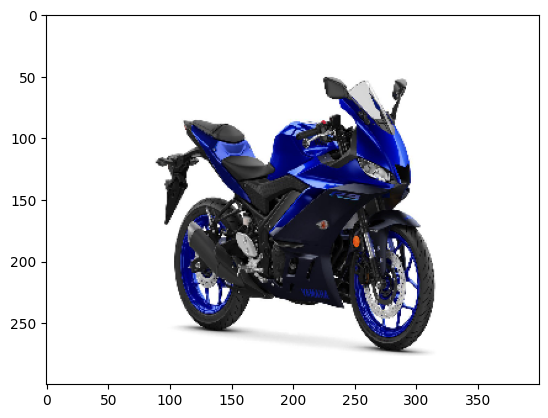

1/1 [==============================] - 0s 78ms/step
Motorbike


In [14]:
filename = "/2022-Yamaha-R3-Motorbike-Icon-Blue.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (CNN.predict(img).argmax())
if(kq == 0):
    print("Bus")
if(kq == 1):
    print("Bycicle")
if(kq == 2):
    print("Car")
if(kq == 3):
    print("Motorbike")
if(kq == 4):
    print("Truck")

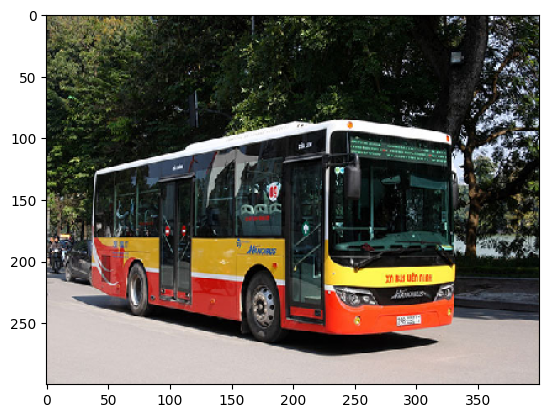

1/1 [==============================] - 0s 82ms/step
Bus


In [15]:
filename = "/lo-trinh-xe-buyt-benh-vien-phu-san-ha-noi-1448.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (CNN.predict(img).argmax())
if(kq == 0):
    print("Bus")
if(kq == 1):
    print("Bycicle")
if(kq == 2):
    print("Car")
if(kq == 3):
    print("Motorbike")
if(kq == 4):
    print("Truck")

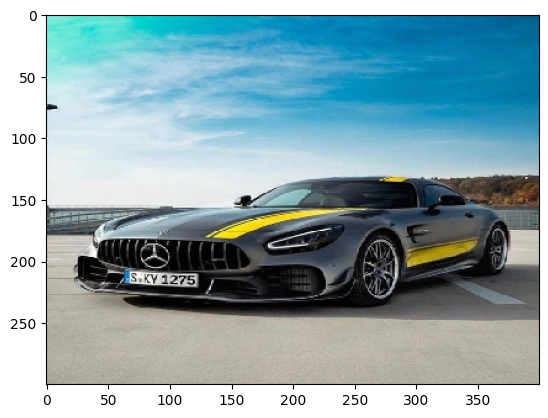

1/1 [==============================] - 0s 18ms/step
Car


In [17]:
filename = "/9c1c9adc78a2da7f736a168b4891ab9c.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (CNN.predict(img).argmax())
if(kq == 0):
    print("Bus")
if(kq == 1):
    print("Bycicle")
if(kq == 2):
    print("Car")
if(kq == 3):
    print("Motorbike")
if(kq == 4):
    print("Truck")

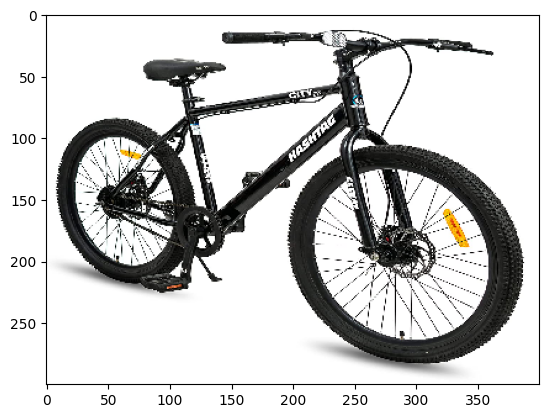

1/1 [==============================] - 0s 19ms/step
Bycicle


In [16]:
filename = "/8125FAVTeYL._SL1500_.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (CNN.predict(img).argmax())
if(kq == 0):
    print("Bus")
if(kq == 1):
    print("Bycicle")
if(kq == 2):
    print("Car")
if(kq == 3):
    print("Motorbike")
if(kq == 4):
    print("Truck")

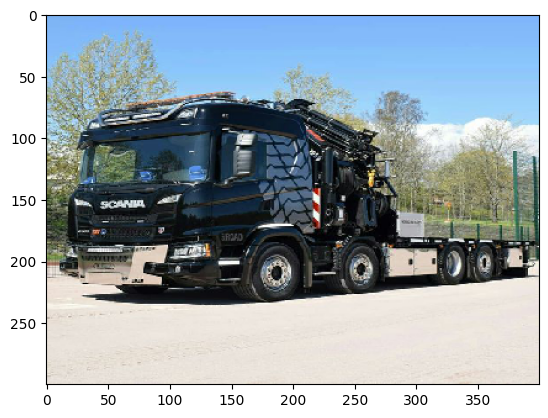

1/1 [==============================] - 0s 45ms/step
Truck


In [18]:
filename = "/795763084e67c36010caf3cc7ec8ee73.jpg"
img = load_img(filename,target_size = (300,400))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,300,400,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
result = (CNN.predict(img).argmax())
if(kq == 0):
    print("Bus")
if(kq == 1):
    print("Bycicle")
if(kq == 2):
    print("Car")
if(kq == 3):
    print("Motorbike")
if(kq == 4):
    print("Truck")